#### Prepare

In [1]:
# Import packages
library("phyloseq")
library("ggplot2")
library("plyr")

In [2]:
# Import data
data(enterotype)
pseq <- subset_taxa(enterotype, Genus != "-1")

head(otu_table(pseq))
head(sample_data(pseq))
head(tax_table(pseq))

,AM.AD.1,AM.AD.2,AM.F10.T1,AM.F10.T2,DA.AD.1,DA.AD.1T,DA.AD.2,DA.AD.3,DA.AD.3T,DA.AD.4,⋯,TS9_V2,TS90_V2,TS91_V2,TS92_V2,TS94_V2,TS95_V2,TS96_V2,TS97_V2,TS98_V2,TS99.2_V2
Prosthecochloris,0,0.00000000,0.00e+00,0.00e+00,0,0.000e+00,0.00e+00,0,0.00e+00,0.000e+00,⋯,0,0,0,0,0,0.00000000,0,0,0,0
Chloroflexus,0,0.00000000,0.00e+00,0.00e+00,0,8.100e-07,0.00e+00,0,0.00e+00,0.000e+00,⋯,0,0,0,0,0,0.00000000,0,0,0,0
Dehalococcoides,0,0.00026835,9.59e-06,0.00e+00,0,0.000e+00,2.03e-05,0,0.00e+00,8.728e-05,⋯,0,0,0,0,0,0.00000000,0,0,0,0
Thermus,0,0.00000000,0.00e+00,4.24e-06,0,0.000e+00,0.00e+00,0,0.00e+00,0.000e+00,⋯,0,0,0,0,0,0.00000000,0,0,0,0
Listeria,0,0.00000000,0.00e+00,0.00e+00,0,0.000e+00,0.00e+00,0,2.43e-06,0.000e+00,⋯,0,0,0,0,0,0.00000000,0,0,0,0
Fusobacterium,0,0.00001508,0.00e+00,0.00e+00,0,3.181e-05,8.52e-06,0,5.80e-06,0.000e+00,⋯,0,0,0,0,0,0.00051315,0,0,0,0


,Enterotype,Sample_ID,SeqTech,SampleID,Project,Nationality,Gender,Age,ClinicalStatus
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
AM.AD.1,NA,AM.AD.1,Sanger,AM.AD.1,gill06,american,F,28,healthy
AM.AD.2,NA,AM.AD.2,Sanger,AM.AD.2,gill06,american,M,37,healthy
AM.F10.T1,NA,AM.F10.T1,Sanger,AM.F10.T1,turnbaugh09,american,F,NA,obese
AM.F10.T2,3,AM.F10.T2,Sanger,AM.F10.T2,turnbaugh09,american,F,NA,obese
DA.AD.1,2,DA.AD.1,Sanger,DA.AD.1,MetaHIT,danish,F,59,healthy
DA.AD.1T,NA,DA.AD.1T,Sanger,NA,NA,NA,NA,NA,NA


,Genus
Prosthecochloris,Prosthecochloris
Chloroflexus,Chloroflexus
Dehalococcoides,Dehalococcoides
Thermus,Thermus
Listeria,Listeria
Fusobacterium,Fusobacterium


#### Distance functions

In [8]:
dist_methods <- unlist(distanceMethodList)
print(dist_methods)

    UniFrac1     UniFrac2        DPCoA          JSD     vegdist1     vegdist2 
   "unifrac"   "wunifrac"      "dpcoa"        "jsd"  "manhattan"  "euclidean" 
    vegdist3     vegdist4     vegdist5     vegdist6     vegdist7     vegdist8 
  "canberra"       "bray" "kulczynski"    "jaccard"      "gower"   "altGower" 
    vegdist9    vegdist10    vegdist11    vegdist12    vegdist13    vegdist14 
  "morisita"       "horn"  "mountford"       "raup"   "binomial"       "chao" 
   vegdist15   betadiver1   betadiver2   betadiver3   betadiver4   betadiver5 
       "cao"          "w"         "-1"          "c"         "wb"          "r" 
  betadiver6   betadiver7   betadiver8   betadiver9  betadiver10  betadiver11 
         "I"          "e"          "t"         "me"          "j"        "sor" 
 betadiver12  betadiver13  betadiver14  betadiver15  betadiver16  betadiver17 
         "m"         "-2"         "co"         "cc"          "g"         "-3" 
 betadiver18  betadiver19  betadiver20  betadiver21 

In [9]:
# These require tree
dist_methods[(1:3)]
# Remove them from the vector
dist_methods <- dist_methods[-(1:3)]

UniFrac1   UniFrac2      DPCoA 
 "unifrac" "wunifrac"    "dpcoa"

In [10]:
# This is the user-defined method:
dist_methods["designdist"]
# Remove the user-defined distance
dist_methods <- dist_methods[-which(dist_methods == "ANY")]

designdist 
     "ANY"

#### Distance plots

In [12]:
# Loop through each distance method, save each plot to a list, called plist.
plist <- vector("list", length(dist_methods))
names(plist) = dist_methods
for( i in dist_methods ){
    # Calculate distance matrix
    iDist <- distance(pseq, method = i)
    # Calculate ordination
    iMDS  <- ordinate(pseq, "MDS", distance = iDist)
    ## Make plot
    # Don't carry over previous plot (if error, p will be blank)
    p <- NULL
    # Create plot, store as temp variable, p
    p <- plot_ordination(pseq, iMDS, color = "SeqTech", shape = "Enterotype")
    # Add title to each plot
    p <- p + ggtitle(paste("MDS using distance method ", i, sep = ""))
    # Save the graphic to file.
    plist[[i]] = p
}

Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“results may be meaningless with non-integer data in method “morisita””
Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“results may be meaningless with non-integer data in method “chao””
Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“results may be meaningless with non-integer data in method “cao””


Warning message:
“Removed 387 rows containing missing values (geom_point).”


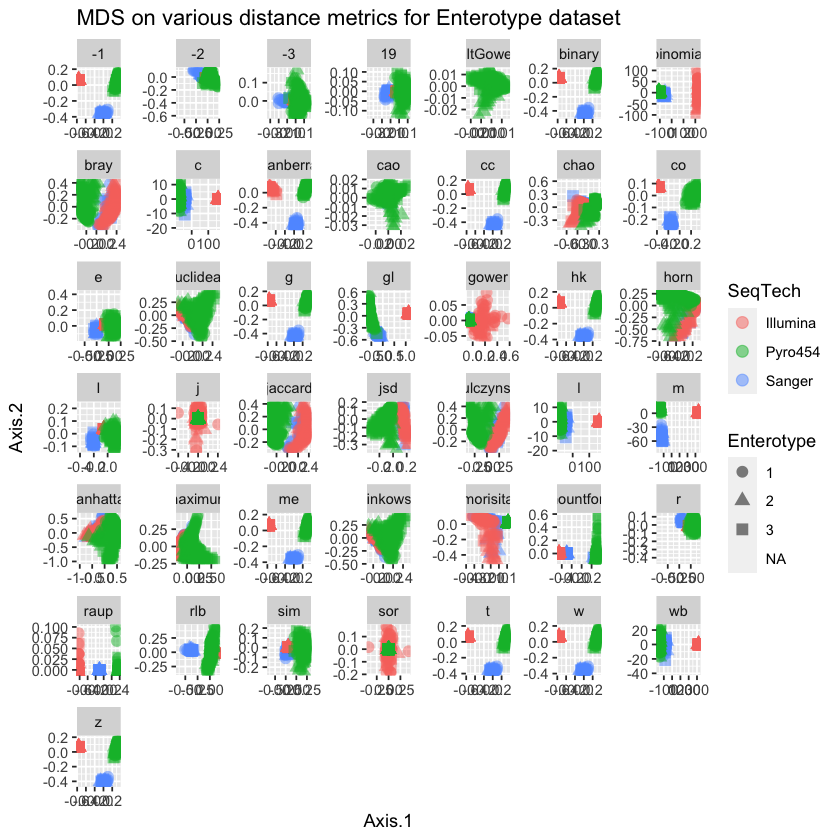

In [13]:
# Loop plot
df = ldply(plist, function(x) x$data)
names(df)[1] <- "distance"
p = ggplot(df, aes(Axis.1, Axis.2, color = SeqTech, shape = Enterotype))
p = p + geom_point(size = 3, alpha = 0.5)
p = p + facet_wrap(~distance, scales = "free")
p = p + ggtitle("MDS on various distance metrics for Enterotype dataset")
           
print(p)

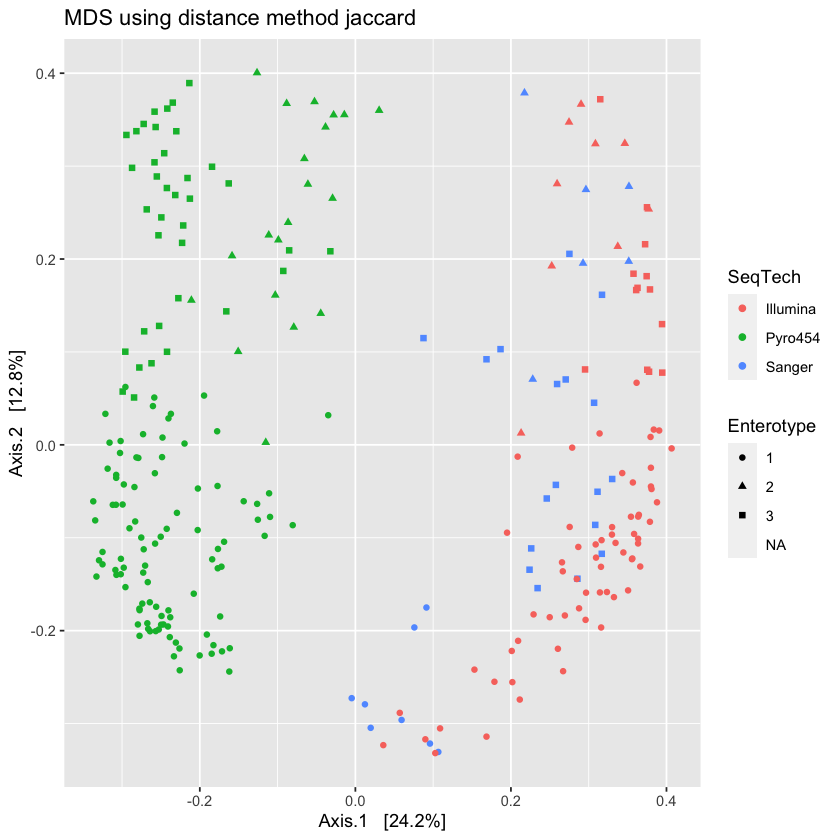

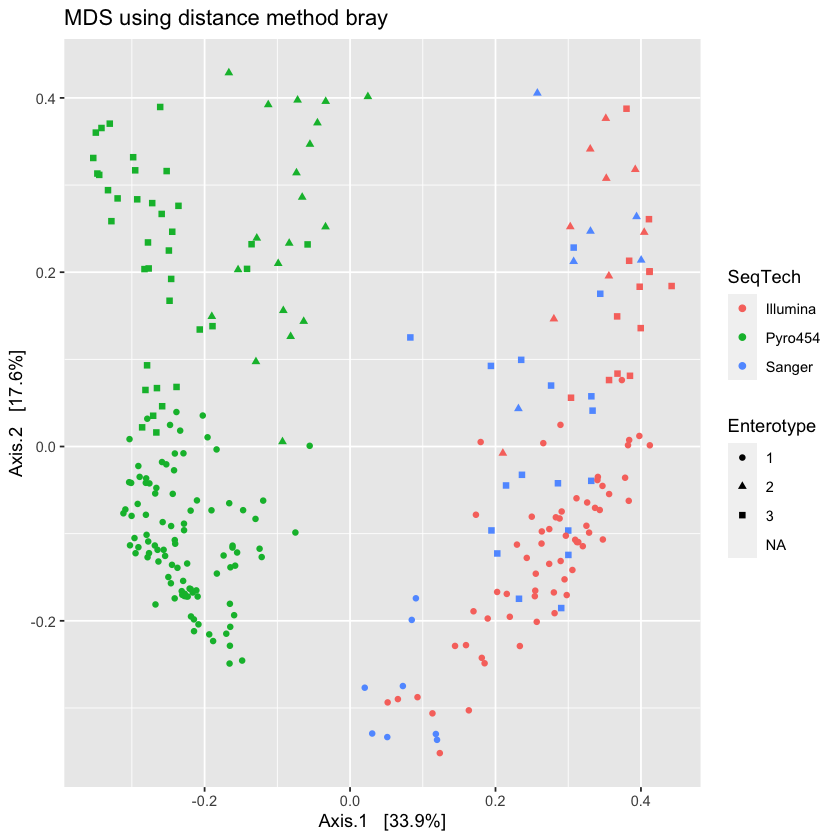

In [14]:
# Single plot
print(plist[["jaccard"]])
print(plist[["bray"]])